# Imports

In [1]:
from utils import load_pickle
import numpy as np
from selection import pds
import torch
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# Functions

# Plot

In [2]:
mmlu_fields_data = load_pickle('data/mmlu_fields_ordered.pickle')

In [ ]:
num_preds_per_scenario = {} # domain -> sample -> model -> prediction
pds_scores = {}
for domain in mmlu_fields_data['data'].keys():
    print(domain)
    num_preds_per_scenario[domain] = []
    pds_scores[domain] = []
    for preds_per_sample in mmlu_fields_data['data'][domain]['predictions']:
        # print(preds_per_sample.shape)
        pds_score = pds(torch.Tensor(preds_per_sample))
        pds_scores[domain].append(pds_score.tolist())
        num_preds_per_scenario[domain].append(preds_per_sample.argmax(-1).tolist())
    # print(num_preds_per_scenario[domain])
    print(len(num_preds_per_scenario[domain]))
    print(len(num_preds_per_scenario[domain][0]))
    print(np.unique(num_preds_per_scenario[domain][0]))
    print(max(pds_scores[domain]))
    print(min(pds_scores[domain]))
    # break
    # print(domain)
    # # print(mmlu_fields_data['data'][domain]['predictions'])
    # print(len(mmlu_fields_data['data'][domain]['predictions']))
    # print((mmlu_fields_data['data'][domain]['predictions'].shape))

In [30]:
domain = 'harness_arc_challenge_25'
print(len(num_preds_per_scenario[domain]))
print(len(num_preds_per_scenario[domain][0]))
print(np.unique(num_preds_per_scenario[domain]))

1172
425
[0 1 2 3 4]


[0 1 2 3 4]


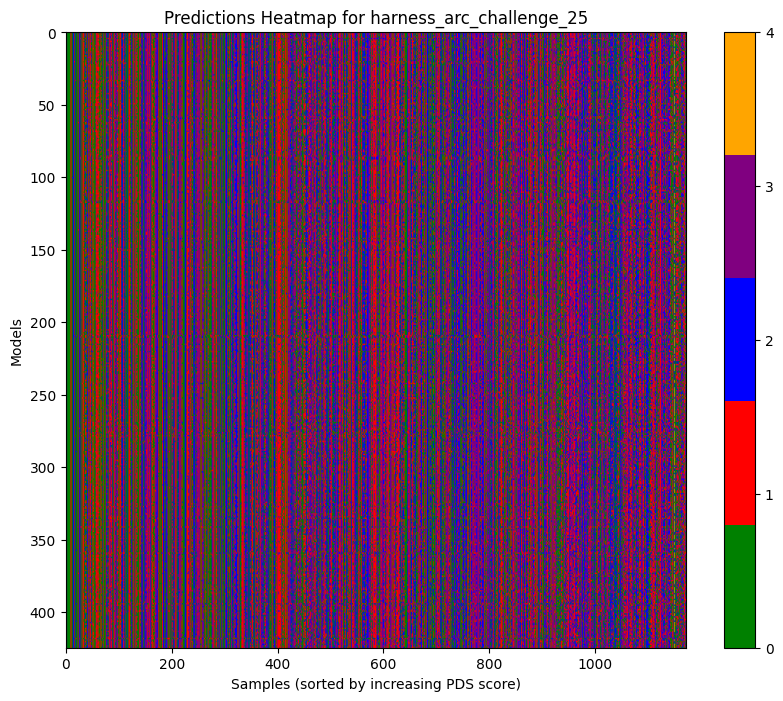

In [34]:


# Plot heatmap for first domain as example
# domain = list(num_preds_per_scenario.keys())[0]
# domain = 'harness_arc_challenge_25'

# Create a custom colormap for the 4 distinct values
all_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
              '#ff1493', '#00ff7f', '#ff4500', '#4169e1', '#ffd700', '#8b008b', '#00ffff', '#ff69b4', '#32cd32', '#ba55d3',
              '#f08080', '#4682b4', '#9370db', '#3cb371', '#ff6347', '#87ceeb', '#dda0dd', '#90ee90', '#f0e68c', '#add8e6',
              '#ffb6c1', '#20b2aa', '#ff00ff', '#00fa9a', '#ffa07a']



for domain in num_preds_per_scenario.keys():
    # Sort samples by PDS score
    pds_scores_domain = pds_scores[domain]
    sorted_indices = np.argsort(pds_scores_domain)
    data = np.array([num_preds_per_scenario[domain][i] for i in sorted_indices]).T

    unique_preds = np.unique(num_preds_per_scenario[domain])
    print(unique_preds)

    colors = all_colors[:len(unique_preds)]
    ticks = np.arange(len(unique_preds))
    custom_cmap = ListedColormap(colors)

    plt.figure(figsize=(10, 8))
    plt.imshow(data, cmap=custom_cmap, aspect='auto')
    plt.colorbar(ticks=ticks)
    plt.xlabel('Samples (sorted by increasing PDS score)')
    plt.ylabel('Models')
    plt.title(f'Predictions Heatmap for {domain}')
    plt.show()
